In [4]:
import gym 
import numpy as np
from custom_envs.gridworlds import WindyGridworldEnv, SimpleGridworldEnv

from function_approximators.function_approximators import NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor, KNeighboursRegressor

from utils.train_utils import train
from utils.plot_utils import plot_returns

from agents.av_agents import DQNAgent, LinearAgent, NonParametricAgent


In [5]:
function_approximators = [NeuralNetwork, LinearModel, DecisionTree, RandomForest, ExtraTrees, GradientBoostingTrees, SupportVectorRegressor, KNeighboursRegressor]
agents = [DQNAgent, LinearAgent, *[NonParametricAgent]*6]

RENDER = False
# env = gym.make("CartPole-v1")
# env = gym.make("Acrobot-v1")
# env = gym.make("MountainCar-v0")
# env = WindyGridworldEnv()
# env = gym.make("LunarLander-v2")
env = SimpleGridworldEnv()

In [6]:
# DQN Config
CONFIG_DQN = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1, 
    "eval_episodes": 1,
    "learning_rate": 0.00075,
    "hidden_size": (32,32),
    "target_update_freq": 200,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_deduct": 0.97,
    "decay": 0.2,
    "lr_step_size": 1000,
    "lr_gamma": 0.95,
    "max_steps": 200,
    "non_param": False,
}

# Linear Config
CONFIG_LINEAR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "learning_rate": 0.02,
    "target_update_freq": 50,
    "batch_size": 32,
    "gamma": 0.99,
    "buffer_capacity": int(1e7),
    "plot_loss": False,
    "epsilon": 1,
    "max_steps": 200,
    "poly_degree": 2,
    "max_deduct": 0.97,
    "decay": 0.5,
    "lr_step_size": 1000,
    "lr_gamma": 0.99,
    "non_param": False,
}

# Decision Tree Config
CONFIG_DT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"criterion":"mse","max_depth": 10, "min_samples_split": 20, "min_samples_leaf": 5},
}

# Random Forest Config
CONFIG_RF = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10,"max_depth": 10, "min_samples_split": 20, "min_samples_leaf": 5},
}

# Extra Trees Config
CONFIG_ET = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 5,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_estimators": 10, "max_depth": 10, "min_samples_split": 20, "min_samples_leaf": 5},
}

# Gradient Boosting Trees Config
CONFIG_GBT = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 10,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e5),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"loss":"ls","learning_rate":0.1, "n_estimators": 10,"max_depth": 10, "min_samples_split": 10, "min_samples_leaf": 10},
}

# Support Vector Regressor Config
CONFIG_SVR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 1000,
    "model_save_capacity": 20,
    "update_freq": 1,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"kernel":"rbf", "degree": 2, "C": 1.5},
}


# K-Neighbors Regressor Config
CONFIG_KNR = {
    "episode_length": 200,
    "max_timesteps": 20000,
    "max_time": 30 * 60,
    "eval_freq": 1000, 
    "eval_episodes": 5,
    "model_save_freq": 2000,
    "model_save_capacity": 10,
    "update_freq": 10,
    "batch_size": 512,
    "gamma": 0.99,
    "buffer_capacity": int(1e6),
    "epsilon": 1,
    "max_deduct": 0.95,
    "decay": 0.3,
    "max_steps": 200,
    "non_param": True,
    "model_params": {"n_neighbors":5, "weights": "uniform", "algorithm": "auto", "leaf_size": 30},
}


In [7]:
returns = []
n_seeds=10

j=0
for i in range(n_seeds):
    print(f"\n Run: {i+1} \n")
    r, _ = train(env, 
            CONFIG_DQN, 
            fa=function_approximators[j], 
            agent = agents[j], 
            render=RENDER)
    env.close()
    returns.append(r)

  0%|          | 36/20000 [00:00<01:15, 263.83it/s]
 Run: 1 

q_loss: 0.9387504458427429
Evaluation at timestep 36 returned a mean returns of -200.0
Epsilon = 1.0
Learning rate = 0.00075
  0%|          | 74/20000 [00:00<01:28, 226.15it/s]Evaluation at timestep 74 returned a mean returns of -200.0
Epsilon = 0.99127
Learning rate = 0.00075
  1%|          | 123/20000 [00:00<01:51, 178.56it/s]Evaluation at timestep 123 returned a mean returns of -200.0
Epsilon = 0.982055
Learning rate = 0.00075
  1%|          | 170/20000 [00:01<02:19, 142.19it/s]Evaluation at timestep 170 returned a mean returns of -200.0
Epsilon = 0.9701725
Learning rate = 0.00075
  2%|▏         | 328/20000 [00:02<02:27, 133.57it/s]Evaluation at timestep 300 returned a mean returns of -200.0
Epsilon = 0.958775
Learning rate = 0.00075
  2%|▏         | 352/20000 [00:02<02:40, 122.15it/s]Evaluation at timestep 328 returned a mean returns of -200.0
Epsilon = 0.92725
Learning rate = 0.00075
  2%|▏         | 352/20000 [00:02<02

In [25]:
mean = [np.mean(returns, axis=0)]
std = [np.std(returns, axis=0)]
print(mean[-1])
print(std[-1])


[ 55.59 105.83 142.63 143.55 159.16 164.79 181.24 171.2  169.29 180.41
 176.37 184.3  185.17 186.68 187.03 185.03 186.14 187.73 187.35 187.38]
[43.78674343 74.68057378 58.50285549 51.5608621  47.32460671 47.17913628
 21.5857453  31.04190716 42.17033199 20.17401547 28.42375943 20.45956989
 20.05737022 19.63893072 20.76535817 21.08445162 17.26975391 16.12526279
 16.83337459 16.65279556]


In [21]:
with open(f'cartpole_K-Neighbours.csv', 'ab') as f:
    np.savetxt(f, mean, delimiter=',')
    np.savetxt(f, std, delimiter=',')
        

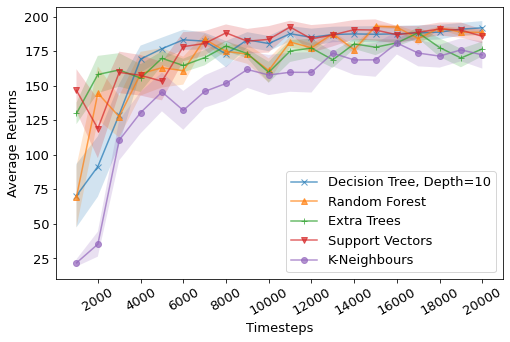

In [22]:
from utils.plot_utils import plot_returns
import numpy as np

legends = ["Decision Tree, Depth=10", "Random Forest", "Extra Trees", "Support Vectors", "K-Neighbours"]
# legends = ["Decision Tree, Depth=6","Decision Tree, Depth=8","Decision Tree, Depth=10", "Decision Tree, Depth=12", "Decision Tree, Depth=14"]
markers = ["x","^","+","v","o"]
means = []
stds = []
for i in range(len(legends)):
    a = np.genfromtxt(f'cartpole_{legends[i]}.csv', delimiter=',')
    means.append(a[0])
    stds.append(a[1]/np.sqrt(10))

plot_returns(save_name="cartpole_non_param", values=means, stds=stds, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000, markers=markers)

